# 문제 1) Tokenizer 생성하기

1-1. 텍스트 전처리를 하는 함수입니다.

- input: 여러 영어 문장이 포함된 list 입니다. ex) ['I go to school.', 'I LIKE pizza!']
- output: 각 문장을 토큰화한 결과로, nested list 형태입니다. ex) [['i', 'go', 'to', 'school'], ['i', 'like', 'pizza']]
- 조건 1: 입력된 문장에 대해서 소문자로의 변환과 특수문자 제거를 수행합니다.
- 조건 2: 토큰화는 white space 단위로 수행합니다.

1-2. 어휘 사전을 구축하는 함수입니다.

- input: 여러 영어 문장이 포함된 list 입니다. ex) ['I go to school.', 'I LIKE pizza!']
- 조건 1: 위에서 만든 `preprocessing` 함수를 이용하여 각 문장에 대해 토큰화를 수행합니다.
- 조건 2: 각각의 토큰을 정수 인덱싱 하기 위한 어휘 사전(`self.word_dict`)을 생성합니다.
    - 주어진 코드에 있는 `self.word_dict`를 활용합니다.

1-3. 어휘 사전을 활용하여 입력 문장을 정수 인덱싱하는 함수입니다.

- input: 여러 영어 문장이 포함된 list입니다. ex) ['I go to school.', 'I LIKE pizza!']
- output: 각 문장의 정수 인덱싱으로, nested list 형태입니다. ex) [[1, 2, 3, 4], [1, 5, 6]]
- 조건 1: 어휘 사전(`self.word_dict`)에 없는 단어는 'oov'의 index로 변환합니다.

In [65]:
import re

class Tokenizer():
  def __init__(self):
    self.word_dict = {'oov': 0}
    self.fit_checker = False
    '''
    문제 1-1.
    ''' 
  def preprocessing(self, sequences):
    result = []
    """
    모든 대문자를 소문자로 변경 후
    정규식을 이용하여 알파벳 소문자 이외의 구두점 삭제
    """
    for sent in sequences:
      # regex = r"[^a-zA-Z0-9 ]"
      # subst = ""
      # sent = re.sub(regex, subst, sent)
      sent = re.sub(r"[^a-zA-Z0-9 ]", "", sent.lower()).split()
      result.append(sent)
    return result
    '''
    문제 1-2.
    '''
  def fit(self, sequences):
    self.fit_checker = False
    """
    정수 인덱싱을 위한 어휘 사전(self.word_dict)을 생성
    """
    tokens = self.preprocessing(sequences)

    for token in tokens:
      for word in token:
        if word not in self.word_dict:
          self.word_dict[word] = len(self.word_dict)

    self.fit_checker = True
    '''
    문제 1-3.
    '''
  def transform(self, sequences):
    result = []
    tokens = self.preprocessing(sequences)
    if self.fit_checker:
      """
      정수 인덱싱으로, nested list 형태
      /없는 단어는 'oov'의 index로 변환
      """
      for token in tokens:
        nested = []
        for word in token:
          if word in self.word_dict:
            nested.append(self.word_dict[word])
          else:
            nested.append(self.word_dict['oov'])
        result.append(nested)

      return result
    else:
      raise Exception("Tokenizer instance is not fitted yet.")

  def fit_transform(self, sequences):
    self.fit(sequences)
    result = self.transform(sequences)
    return result

In [66]:
tokenizer = Tokenizer()
sample = ['I go to school.', 'I LIKE pizza!']

print("문제 1-1.")
print(tokenizer.preprocessing(sample))
print(" ")
print("문제 1-2.")
tokenizer.fit(sample)
print(tokenizer.word_dict)
print(" ")
print("문제 1-3.")
print(tokenizer.transform(sample))

문제 1-1.
[['i', 'go', 'to', 'school'], ['i', 'like', 'pizza']]
 
문제 1-2.
{'oov': 0, 'i': 1, 'go': 2, 'to': 3, 'school': 4, 'like': 5, 'pizza': 6}
 
문제 1-3.
[[1, 2, 3, 4], [1, 5, 6]]


# **문제 2) TfidfVectorizer 생성하기**

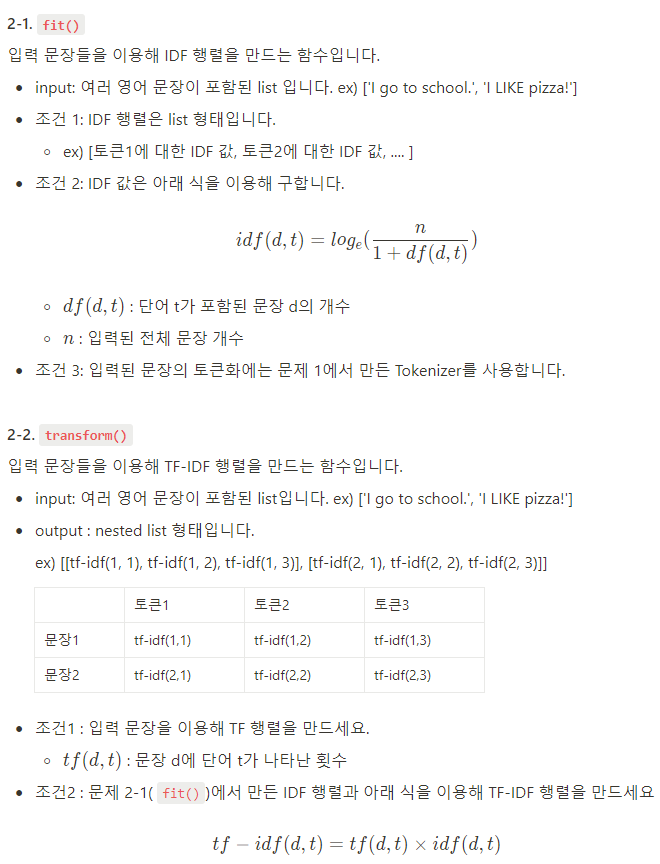

In [67]:
from math import log

class TfidfVectorizer:
  def __init__(self, tokenizer):
    self.tokenizer = tokenizer
    self.fit_checker = False

    '''
    문제 2-1.
    '''
  def fit(self, sequences):
    tokenized = self.tokenizer.fit_transform(sequences)
    """
    입력 문장들을 이용해 IDF 행렬을 만드는 함수
    """
    self.idf_matrix = []
    n = len(tokenized)
    word_list = list(self.tokenizer.word_dict.values())

    for word_list in range(len(word_list)):
      df = 0
      for token in tokenized:
        if word_list in token:
          df += 1
      self.idf_matrix.append(log(n/(1+df)))

    self.fit_checker = True

    '''
    문제 2-2.
    '''
  def transform(self, sequences):
    self.tfidf_matrix = []
    if self.fit_checker:
      tokenized = self.tokenizer.transform(sequences)
      """
      입력 문장들을 이용해 TF-IDF 행렬을 만드는 함수
      """
      for token in tokenized:
        tfidf_list = []
        for i in range(len(self.idf_matrix)):
          tfidf_list.append(self.idf_matrix[i] * token.count(i+1))
        
        self.tfidf_matrix.append(tfidf_list)


      return self.tfidf_matrix
    else:
      raise Exception("TfidfVectorizer instance is not fitted yet.")

  def fit_transform(self, sequences):
    self.fit(sequences)
    return self.transform(sequences)

In [89]:
tokenizer2 = TfidfVectorizer(Tokenizer())
sample = ['I go to school.', 'I LIKE pizza!']

tokenizer2.fit(sample)
print("문제 2-1.")
print(tokenizer2.idf_matrix)
print(" ")
print("문제 2-2.")
print(tokenizer2.transform(sample))
print(" ")
print(tokenizer2.tokenizer.word_dict)

문제 2-1.
[0.6931471805599453, -0.40546510810816444, 0.0, 0.0, 0.0, 0.0, 0.0]
 
문제 2-2.
[[0.6931471805599453, -0.40546510810816444, 0.0, 0.0, 0.0, 0.0, 0.0], [0.6931471805599453, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]
 
{'oov': 0, 'i': 1, 'go': 2, 'to': 3, 'school': 4, 'like': 5, 'pizza': 6}
